# 基于随机森林的医疗费用分析与建模预估

作者： 寒小阳、助教-Choc

### 作业说明

· 任务一：选出特征和标签（用作数据分析）

· 任务二：选出实际建模时所用的特征与标签，并对数据进行标准化处理

· 任务三：构建模型，并进行训练、测试和评估

· 任务四：在新数据上进行预测

#### 步骤 0：import 需要的工具库

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics

#### 步骤 1：加载数据，并进行分析

In [2]:
df = pd.read_csv('./insurance.csv')
#剔除缺失值
df = df.dropna()
#查看数据分布状况
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
#查看不同维度之间的相关性
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#### **任务一：选出特征和标签（用作数据分析）**

数据分布分析：


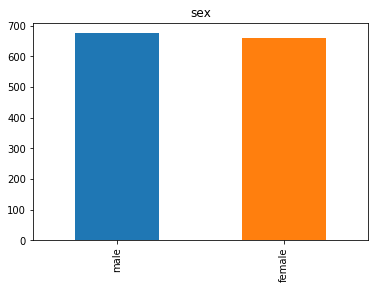

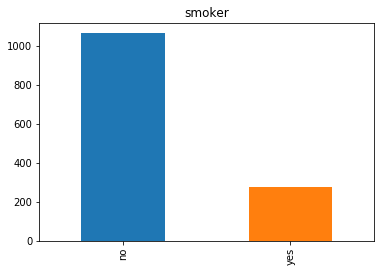

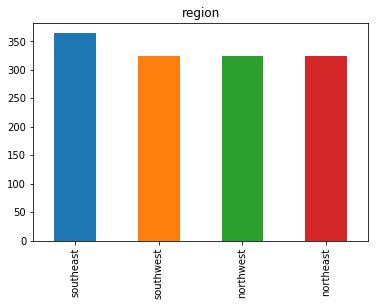

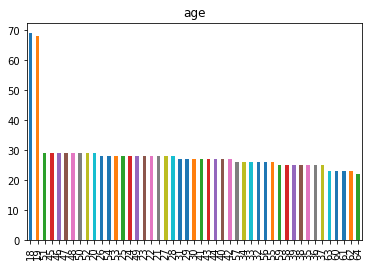

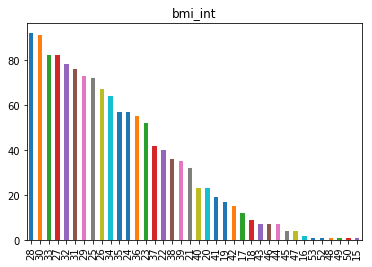

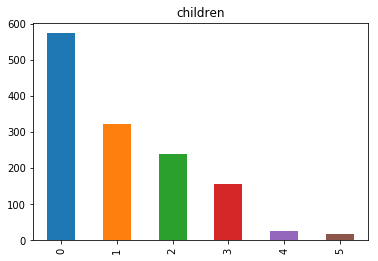

In [4]:
# 注：bmi（Body Mass Index）为身体质量指数，这里省略小数点来区间化特征，方便做数据分析
df['bmi_int'] = df['bmi'].apply(lambda x: int(x))

# 提示：可使用head函数查看列表；根据主题 医疗费用分析 选出特征
variables = ['sex','smoker','region','age','bmi_int','children']

# 数据分布分析
print('数据分布分析：')
for v in variables:
    df = df.sort_values(by=[v])
    df[v].value_counts().plot(kind = 'bar')
    plt.title(v)
    plt.show()

平均医疗开销分析：


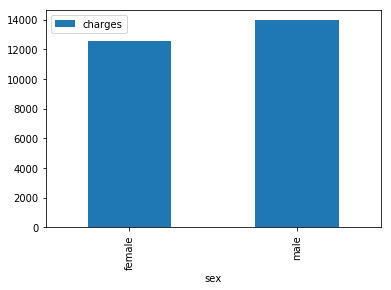

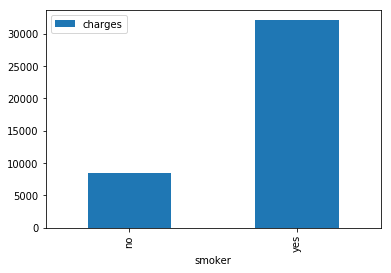

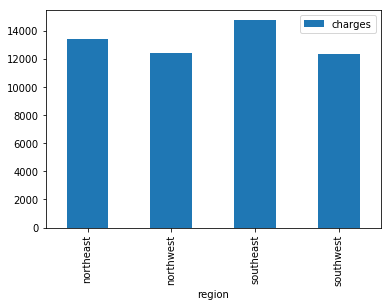

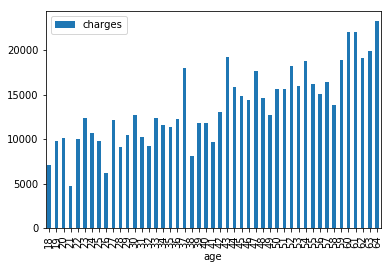

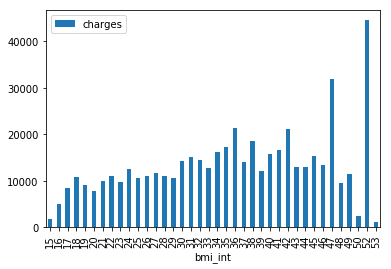

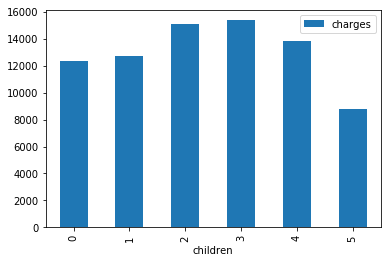

In [5]:
#平均医疗开销分析
print('平均医疗开销分析：')
for v in variables:
    group_df = df.groupby(pd.Grouper(key=v)).mean()
    group_df = group_df.sort_index()
    group_df.plot(y = ['charges'],kind = 'bar')
    plt.show()

两两变量分析：


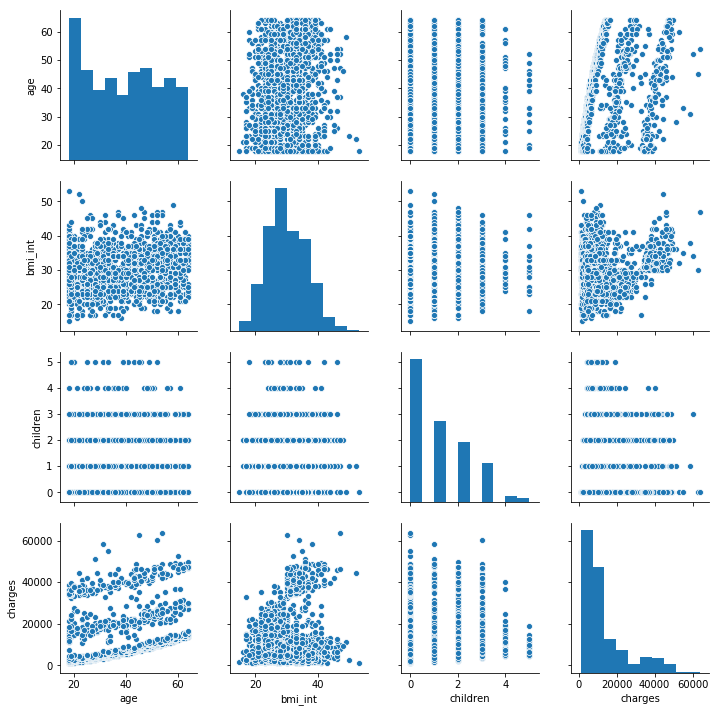

In [6]:
#两两变量分析
print('两两变量分析：')
variables = ['sex','smoker','region','age','bmi_int','children','charges']
sns_plot = sns.pairplot(df[variables])
plt.show()

#### 步骤 3：构建模型

In [7]:
print('建模与评估\n\n')

#对类别型变量进行编码
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])
df['region'] = le_region.fit_transform(df['region'])

建模与评估




#### **任务二：选出实际建模时所用的特征与标签，并对数据进行标准化处理**

In [8]:
# YOUR CODE BELOW
variables = ['sex','smoker','region','age','bmi','children'] # 选择特征
X = df[variables] # 导入特征数据
sc = StandardScaler()
X = sc.fit_transform(X) # 对数据标准化处理
Y = df['charges'] # 导入标签数据          

# 使用sklearn.model_selection库自动对数据进行训练集与测试集的分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#### **任务三：构建模型，并进行训练、测试和评估**

In [11]:
# YOUR CODE BELOW
regressor =  RandomForestRegressor(n_estimators=200)                 
# 使用import的随机森林模型，并设置不同的树的数量进行试验，参考值为200

# 使用fit函数对X_train,y_train进行拟合
regressor.fit(X_train,y_train)
 
# prediction and evaluation
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [12]:
#计算相应的MAE和RMSE，填入计算需要的值到括号中
print('RandomForestRegressor evaluating result:')
print("Train MAE: ", sklearn.metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error(y_train, y_train_pred)))
print("Test MAE: ", sklearn.metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_test_pred)))

RandomForestRegressor evaluating result:
Train MAE:  1007.3109429501233
Train RMSE:  1879.9607902901178
Test MAE:  2706.306066750849
Test RMSE:  4569.264952617764


特征重要度排序


1.smoker(0.634779)
2.bmi(0.200183)
3.age(0.127276)
4.children(0.017751)
5.region(0.013467)
6.sex(0.006544)


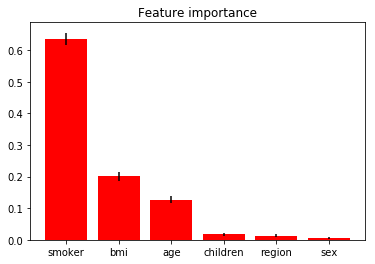

In [13]:
# 简单可视化模型，查看各个特征在随机森林中的重要度
print('特征重要度排序\n\n')
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importance")
plt.bar(importance_list, importances[indices],
       color="r", yerr=std[indices], align="center")
plt.show()

#### 步骤 4：使用模型预测

#### **任务四：在新数据上进行预测**

In [14]:
print('在新数据上进行预测\n\n')

# 构建新数据
billy = ['male','yes','southeast',25,30.5,2]
print('Billy - ',str(billy))

# 对数据进行标准化处理，注意这里要用与训练时相同的模型，不可重新fit
# 另外注意，这里的函数输入的是一列，返回的也是列，故需要添加[]，同时返回值也需要提取数据
billy[0] = le_sex.transform([billy[0]])[0] 
billy[1] = le_smoker.transform([billy[1]])[0] 
billy[2] = le_region.transform([billy[2]])[0] 

# 与上边同理
X = sc.transform([billy])

# 对新数据进行预测
cost_for_billy = regressor.predict(X)[0]
print('Billy的医疗开销 = ',cost_for_billy,'\n\n')

# 第二个新数据，理解上边的注释，仿写
dennis = ['female','no','southeast',45,19,0]
print('Dennis - ',str(dennis))

dennis[0] = le_sex.transform([dennis[0]])[0] 
dennis[1] = le_smoker.transform([dennis[1]])[0] 
dennis[2] = le_region.transform([dennis[2]])[0] 
 
X = sc.transform([dennis])
 
cost_for_dennis = regressor.predict(X)[0]

print('Dennis的医疗开销 = ',cost_for_dennis)

在新数据上进行预测


Billy -  ['male', 'yes', 'southeast', 25, 30.5, 2]
Billy的医疗开销 =  34783.16607775 


Dennis -  ['female', 'no', 'southeast', 45, 19, 0]
Dennis的医疗开销 =  8951.949512349995
